In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df1 = pd.read_csv('Social_Network_Ads with null values.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.sample(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
230,15794253,Female,35,147000,1
353,15750335,Female,37,57000,0
372,15629885,Female,39,73000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.shape

(400, 5)

In [8]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [9]:
df.groupby(['Gender','Purchased']).size()

Gender  Purchased
Female  0            127
        1             77
Male    0            130
        1             66
dtype: int64

In [10]:
df.groupby(['Age','Purchased']).size()

Age  Purchased
18   0            5
19   0            7
20   0            7
21   0            4
22   0            5
                 ..
57   1            5
58   1            6
59   0            2
     1            5
60   1            7
Length: 70, dtype: int64

In [11]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
df1.isnull().sum()

User ID            0
Gender             2
Age                2
EstimatedSalary    2
Purchased          2
dtype: int64

In [13]:
df1['Age'].mean()

37.59045226130653

In [14]:
df1['Age'].median()

37.0

In [15]:
df1['Gender'].mode()[0] #if we donot write [0] it will show result as 'Female [0]. so inorder to remove index, we need to put [0]. for second most repeated value, we need to put [1].

'Female'

In [16]:
df1.fillna(df1['Age'].mean())

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0.0
1,15810944,Male,35.0,20000.0,0.0
2,15668575,Female,26.0,43000.0,0.0
3,15603246,Female,27.0,57000.0,0.0
4,15804002,Male,19.0,76000.0,0.0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1.0
396,15706071,Male,51.0,23000.0,1.0
397,15654296,37.590452,50.0,20000.0,1.0
398,15755018,Male,36.0,33000.0,0.0


In [17]:
df1['Age']=df1['Age'].fillna(df1['Age'].mean()) #inplace makes the changes permanent in pandas

In [18]:
df1.isnull().sum()

User ID            0
Gender             2
Age                0
EstimatedSalary    2
Purchased          2
dtype: int64

In [19]:
df1['EstimatedSalary'].mean()

69741.20603015076

In [20]:
df1['EstimatedSalary'].median()

70000.0

In [21]:
df1.fillna(df1['EstimatedSalary'].median())

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0.0
1,15810944,Male,35.0,20000.0,0.0
2,15668575,Female,26.0,43000.0,0.0
3,15603246,Female,27.0,57000.0,0.0
4,15804002,Male,19.0,76000.0,0.0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1.0
396,15706071,Male,51.0,23000.0,1.0
397,15654296,70000.0,50.0,20000.0,1.0
398,15755018,Male,36.0,33000.0,0.0


In [22]:
df1['EstimatedSalary']=df1['EstimatedSalary'].fillna(df1['EstimatedSalary'].median())

In [23]:
df1.isnull().sum()

User ID            0
Gender             2
Age                0
EstimatedSalary    0
Purchased          2
dtype: int64

In [24]:
df1['Purchased'].mode()[0]

0.0

In [25]:
df1['Purchased']=df1['Purchased'].fillna(df1['Purchased'].mode()[0])

In [26]:
df1.isnull().sum()

User ID            0
Gender             2
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [27]:
df1['Gender']=df1['Gender'].fillna(df1['Gender'].mode()[0])

In [28]:
df1.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [29]:
x=df1.drop(columns=['Purchased'])
y=df1['Purchased']

In [30]:
df1.to_csv('cleanedfile.csv')

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=55)

In [32]:
labelencoder=LabelEncoder()
x_train['Gender']=labelencoder.fit_transform(x_train['Gender'])
x_test['Gender']=labelencoder.transform(x_test['Gender'])

In [33]:
len(x_train)

320

In [34]:
len(y_train)

320

In [35]:
x_test

,User ID,Gender,Age,EstimatedSalary
26,15792818,1,49.0,28000.0
258,15569641,0,58.0,95000.0
128,15722758,1,30.0,17000.0
126,15610801,1,42.0,65000.0
6,15598044,0,27.0,84000.0
...,...,...,...,...
4,15804002,1,19.0,76000.0
119,15701962,1,41.0,59000.0
41,15591915,0,33.0,51000.0
332,15769902,1,42.0,65000.0


In [36]:
scalar = StandardScaler()

In [37]:
scalar

StandardScaler()

In [38]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)
x_train

array([[-0.44652513, -0.95716648, -1.77024877, -1.26127779],
       [-0.2218551 , -0.95716648,  0.31651845, -0.54234496],
       [-0.19290098, -0.95716648, -1.67539572, -0.97370466],
       ...,
       [-0.3272481 ,  1.04475034,  0.98048984, -1.0599766 ],
       [ 0.44270824, -0.95716648, -0.15774683, -0.1972572 ],
       [-1.23826334,  1.04475034,  0.22166539, -0.65737421]])

In [39]:
clf=KNeighborsClassifier()

In [40]:
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [41]:
y_pred=clf.predict(x_test)

In [42]:
y_pred

array([1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [43]:
pd.DataFrame({'y_test' : y_test, 'y_predict' : y_pred})

,y_test,y_predict
26,1.0,1.0
258,1.0,1.0
128,0.0,0.0
126,0.0,0.0
6,0.0,0.0
...,...,...
4,0.0,0.0
119,0.0,0.0
41,0.0,0.0
332,0.0,0.0


In [44]:
# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  0.9625
Recall Score:  0.9583333333333334
Precision Score:  0.92
F1 Score:  0.9387755102040817
Confusion Matrix: 
 [[54  2]
 [ 1 23]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        56
         1.0       0.92      0.96      0.94        24

    accuracy                           0.96        80
   macro avg       0.95      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



Text(50.722222222222214, 0.5, 'Actual')

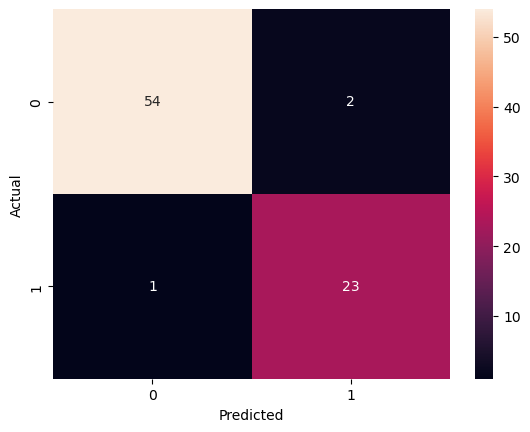

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [46]:
%pip install mlxtend
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

Note: you may need to restart the kernel to use updated packages.


ValueError: y must be an integer array. Found float64. Try passing the array as y.astype(np.int_)

In [ ]:
plot_decision_regions(x_test, y_test.values, clf=clf, legend=2)